In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
%matplotlib inline

In [8]:
import qkit.analysis.dat_reader as dr

In [9]:
import matplotlib.colors as col
import matplotlib.cm as cm

In [10]:
np.set_printoptions(threshold='nan')

In [11]:
#stridat = "//pi-us28/patrick/Masks/Mask #2/JPA01/data/20151211/145953_1D2_VNA_tracedata/145953_1D2_VNA_tracedata.dat"
stridat = "//pi-us28/patrick/Masks/Mask #2/JPA01/data/20151211/144213_1D2_VNA_tracedata/144213_1D2_VNA_tracedata.dat"
#stridat = "//pi-us28/patrick/Masks/Mask #2/JPA01/data/20151211/172522_1D2_VNA_tracedata/172522_1D2_VNA_tracedata.dat"
data = np.genfromtxt(stridat).T   #genformtxt: Load data from a text file, with missing values handled as specified.

In [12]:
print data.shape      #the L occures for large arrays

(4, 15000)


In [13]:
row_x = 0
row_y = 1
row_d = 2    #= 6 before, changed to 2 (amplitude)

In [14]:
x_val = np.unique(data[row_x])        #finds the unique elements of an array
len(x_val)                            #x_val contains all unique elements

15

In [16]:
#y_val = np.extract(x_val == x_val[0],data[row_y])
y_val = np.extract(data[row_x] == data[row_x][0],data[row_y])     #first argument: condition, second argument: array
len(y_val)                                                        #y_val contains all frequencies. 1000 entries

1000

In [17]:
m_dat_arr = []
for y in y_val:                                                     #y: frequency
    m_dat_arr.append(np.extract(data[row_y] == y,data[row_d]))      #extract: if data[row_y] == y (for every freq.), save data[row_d] (amplitude)
                                                                    #append(): append values to the end of an array
    
#for loop adds a row with entries for every frequency value y; the number of columns is given by the number of different p values
#print m_dat_arr

In [21]:
m_dat = np.array(m_dat_arr)
print m_dat.shape

print np.mean(m_dat[:,1])

(1000, 15)
0.393855243981


In [14]:
def data_mask(tolerance = 1):   #creates data mask             #.T creates the transpose of the matrix/array which makes it  
    m = m_dat.T                                                #quite convenient to seperate different entries by sequence unpacking 
    mask_a = []
    for c in range(m.shape[0]):                             #m.shape[0]: number of entries in the oth row (= oth column of m_dat) m.shape[0]= len(x_val) = 15
        #m[c] is the cth row of m
        lower_th = np.mean(m[c]) - tolerance*np.abs(np.mean(m[c]))      #lower threshold
        #lower_th = 0.0 for tolerance = 1
        upper_th = np.mean(m[c]) + tolerance*np.abs(np.mean(m[c]))      #upper threshold
        #np.any tests if an element is True or False with respect to the declared condition(s)
        mask_a.append(np.any((m[c] < lower_th, m[c] > upper_th),axis=0))   #creates mask array, that contains the information about invalid values in m
    return np.array(mask_a).T                                              #axis = 0 means testing columnwise
                                                                           


#data_mask()


In [15]:
"""def norm_data()
    m = m_dat.T   #creates transposed matrix
    mask_a = []   #mask array
    
    for c in range(m.shape[0]):
        min_v = np.min(m[c])
    
"""   

'def norm_data()\n    m = m_dat.T   #creates transposed matrix\n    mask_a = []   #mask array\n    \n    for c in range(m.shape[0]):\n        min_v = np.min(m[c])\n    \n'

In [16]:
def normalize(m):   #normalize columnwise (c: column)
    m_n = m
    min_v = np.ma.min(np.ma.masked_array(m_dat, data_mask()))
    m_n = m_n - min_v
    #for c in range(len(m_n[0])):                                   #m_n[0] contains all frequencies (m is transposed of m_dat)
        #np.ma.masked_array: subclass to manipulate arrays with missing data
    #    m_n[:,c] = m_n[:,c] - min_v   # -> min. value of m[:,c] = 0       #ma.masked_array(array, mask), compares array to array-like mask
    max_v = np.ma.max(np.ma.masked_array(m_n, data_mask()))             #max value of the whole dataset
    print max_v                                                  
    m_n /= max_v    #normalize towards the max value of the whole dataset
    return m_n

In [17]:
#normalized data: 
m_dat_n = normalize(m = m_dat)


#attention: when normalize(m) is called, the real data m_dat are normalized too

0.162935245894


In [18]:
X, Y = np.meshgrid(x_val, y_val)

In [19]:


startcolor = 'blue'  # a dark olive 
midcolor = 'white'    # a bright yellow
endcolor = 'red'    # medium dark red
c_cmap = col.LinearSegmentedColormap.from_list('olive',[startcolor,midcolor,endcolor])
# extra arguments are N=256, gamma=1.0
cm.register_cmap(cmap=c_cmap)



In [20]:
font = {'weight' : 'normal', 'size' : 20}
plt.rc('font', **font)
labelsize=27

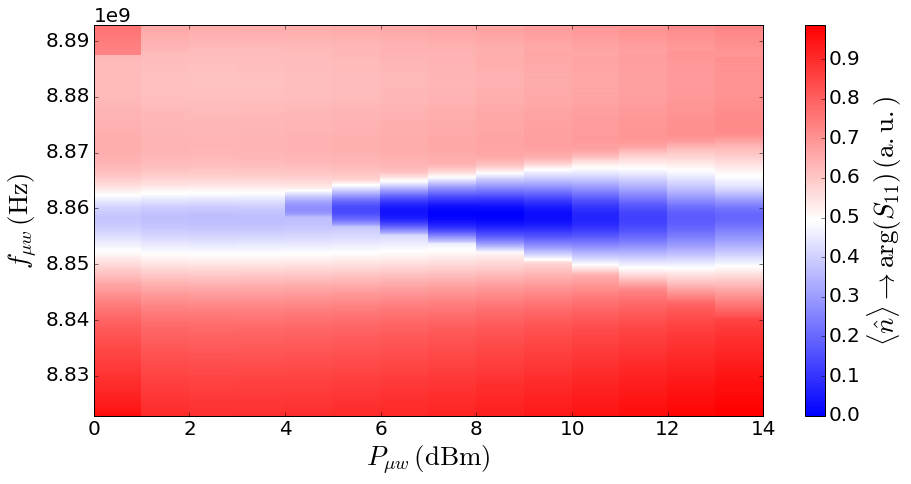

In [21]:
fig, axes = plt.subplots(figsize=(15,7))
p = axes.pcolor(X, Y, np.ma.masked_array(m_dat_n, data_mask()), cmap=c_cmap)
cb = fig.colorbar(p, ax=axes)
cb.set_label(r'$\langle\hat n\rangle \rightarrow \arg (S_{11})\,\mathrm{(a.u.)}$', fontsize=labelsize)
#p.set_clim(0.7,1)
axes.set_xlim(x_val[0], x_val[-1])
#axes.set_xlim(x_val[0], 15)
axes.set_ylim(y_val[0], y_val[-1])
axes.set_xlabel(r'$P_{\mu w}\,(\mathrm{dBm})$', fontsize=labelsize)
axes.set_ylabel(r'$f_{\mu w}\,(\mathrm{Hz})$', fontsize=labelsize)
#fig.tight_layout()


In [22]:
fig.savefig('power_scan_JPA01_01_40dB.png', dpi=300)

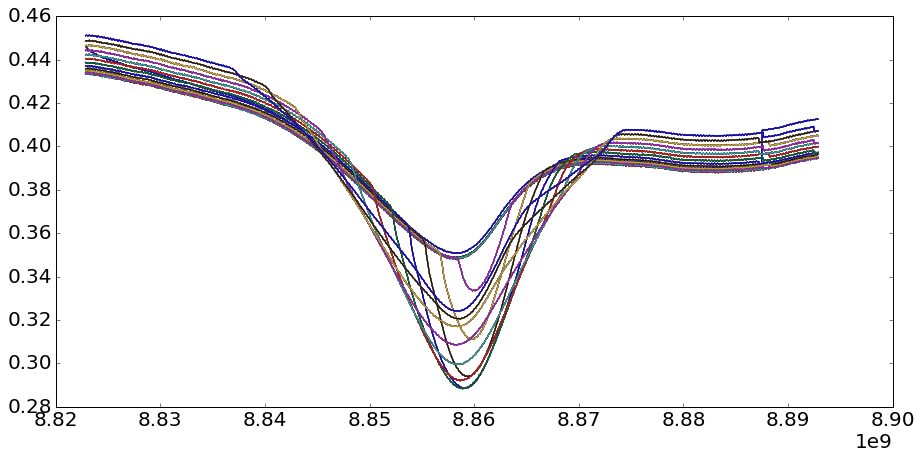

In [23]:

fig, axes = plt.subplots(figsize=(15,7))
for n in range(15):
    axes.plot(Y,np.ma.masked_array(m_dat[:,n], data_mask()[:,n]))
plt.show()

In [24]:
fig.savefig('freq_spec_0dB_2.png', dpi=300)